## Miguel Angel Domínguez Mendoza

Importamos las librerias necesarias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
import pandas as pd
%matplotlib inline

Para este experimiento utilizaremos aumento de datos y la arquitectura de la alex net para comparar los resultados.

### Aumento de datos

Para el aumento de datos se utilizaran las siguiente técnicas:


1.   Ángulo de rotación de hasta 20 grados
2.   Rango para ajuste de ancho de hasta 20%
3.   Rango para ajuste de altura de hasta 20%
4.   Rango para ajuste de ejes posicionales X,Y,Z de hasta 20%
5.   Rango para acercamiento de altura de hasta 20%
6.   Volteo horizantal



In [ ]:
train_datagen = ImageDataGenerator(validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',rescale = 1/255)
test_datagen = ImageDataGenerator(rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',rescale = 1/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Procesamiento_y_Clasificacion_de_Datos/Tarea_6/hand_sing_dataset/Train',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale',
    subset = 'training'
    )

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Procesamiento_y_Clasificacion_de_Datos/Tarea_6/hand_sing_dataset/Train',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale',
    subset = 'validation'
    )

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Procesamiento_y_Clasificacion_de_Datos/Tarea_6/hand_sing_dataset/Test',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale'
    )

Found 15305 images belonging to 24 classes.
Found 3818 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [ ]:
classes = [char for char in string.ascii_uppercase]
print(classes, end = " ")

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'] 

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

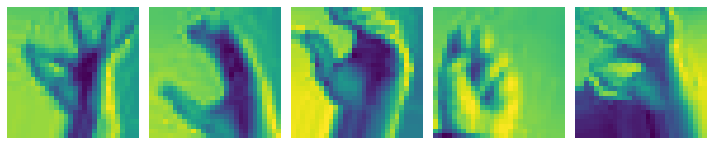

In [ ]:
sample_training_images, _ = next(train_generator)
plotImages(sample_training_images[:5])

# Definimos la siguiente arquitectura


1.   Capa de 64 neuronas con un filtro de 3x3 activación ReLU
2.   Maxpooling de tamaño 2x2
3.   Capa de aplanamiento
4.   Capa de 256 neuronas
5.   Capa de 256 neuronas
6.   Capa de salida softmax de tamaño 26 (una neurona por cada letra)







In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(128, (3,3), activation = "relu", input_shape = (28,28,1)),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(128, (3,3), activation = "relu"),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation = "relu"),
        tf.keras.layers.Dense(256, activation = "relu"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(len(classes), activation = "softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

Definimos la siguiente función de paro, en caso de que en alguna de las épocas alcance una asertividad mayor de 99.4 en ese momento detenga.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get("loss") < 0.004:
            print("\nAlcanzó el 99.6% de asertividad por lo que se cancela el entrenamiento!")
            self.model.stop_training = True

callback = myCallback()

In [ ]:
model.compile(
    optimizer = RMSprop(learning_rate = 0.001),
    loss="sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    callbacks = [callback],
    validation_data = validation_generator
)

Epoch 1/10
120/120 [==============================] - 1894s 16s/step - loss: 2.8397 - accuracy: 0.0747 - val_loss: 2.7122 - val_accuracy: 0.1137
Epoch 2/10
120/120 [==============================] - 71s 590ms/step - loss: 2.5562 - accuracy: 0.1635 - val_loss: 2.3322 - val_accuracy: 0.2342
Epoch 3/10
120/120 [==============================] - 68s 568ms/step - loss: 2.2612 - accuracy: 0.2419 - val_loss: 2.0806 - val_accuracy: 0.2920
Epoch 4/10
120/120 [==============================] - 70s 578ms/step - loss: 1.9825 - accuracy: 0.3246 - val_loss: 1.7895 - val_accuracy: 0.3921
Epoch 5/10
120/120 [==============================] - 68s 562ms/step - loss: 1.7259 - accuracy: 0.4174 - val_loss: 1.6297 - val_accuracy: 0.4196
Epoch 6/10
120/120 [==============================] - 70s 580ms/step - loss: 1.4949 - accuracy: 0.4828 - val_loss: 1.3183 - val_accuracy: 0.5477
Epoch 7/10
120/120 [==============================] - 70s 578ms/step - loss: 1.2931 - accuracy: 0.5521 - val_loss: 1.1302 - val_ac

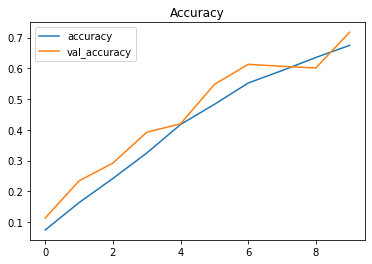

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

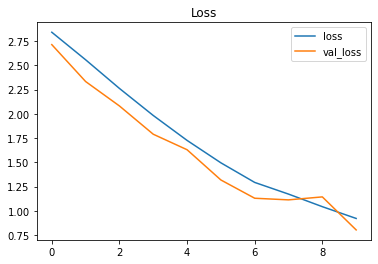

In [ ]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()

## Conclusión:



Despues de 10 épocas con una duración de 20 minutos cada una de ellas, podemos observar que tenemos el comportamiento esperado, 
es decir, tenemos una línea con tendencia a la alta en la asertividad durante las 10 épocas, por otro lado, tenemos una línea con tendencia a la baja
para la pérdida. Otro punto que vale la pena mucho resaltar es la cercanía que tienen las líneas del conjunto de entrenamineto y el de validación
en ambas gráficas.

Aúnque no estén de manera explícita los experimiento que realizamos, notamos que a mayor número de capas de convoluciones las épocas tardaba mucho menos y esto era porque tenían mucho menos parámetros y no por ello eran menos eficientes.